Source: https://github.com/MaxHalford/prince

In [1]:
!pip install prince

In [1]:
import numpy as np
import pandas as pd
import prince
from sklearn import datasets

# PCA

In [4]:
X, y = datasets.load_iris(return_X_y=True)

In [5]:
X = pd.DataFrame(data=X, columns=['Sepal length', 'Sepal width', 'Petal length', 'Petal width'])
y = pd.Series(y).map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

In [9]:
pca = prince.PCA(
      n_components=2,
      n_iter=3,
      rescale_with_mean=True,
      rescale_with_std=True,
      copy=True,
      check_input=True,
      engine='auto',
      random_state=42
)
pca = pca.fit(X)

In [11]:
pca.explained_inertia_

array([0.72962445, 0.22850762])

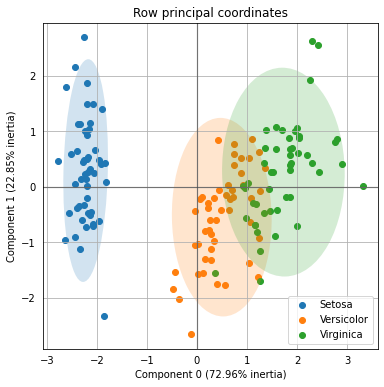

In [20]:
ax = pca.plot_row_coordinates(
     X,
     ax=None,
     figsize=(6, 6),
     #x_component=0,
     #y_component=1,
     labels=None,
     color_labels=y,
     ellipse_outline=False,
     ellipse_fill=True,
     show_points=True
)

# CA

In [2]:
import pandas as pd

In [3]:
pd.set_option('display.float_format', lambda x: '{:.6f}'.format(x))

In [4]:
X = pd.DataFrame(
   data=[
       [326, 38, 241, 110, 3],
       [688, 116, 584, 188, 4],
       [343, 84, 909, 412, 26],
       [98, 48, 403, 681, 85]
   ],
   columns=pd.Series(['Fair', 'Red', 'Medium', 'Dark', 'Black']),
   index=pd.Series(['Blue', 'Light', 'Medium', 'Dark'])
)

In [5]:
X

,Fair,Red,Medium,Dark,Black
Blue,326,38,241,110,3
Light,688,116,584,188,4
Medium,343,84,909,412,26
Dark,98,48,403,681,85


In [6]:
import prince
ca = prince.CA(
    n_components=2,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=42
)
X.columns.rename('Hair color', inplace=True)
X.index.rename('Eye color', inplace=True)
ca = ca.fit(X)

In [7]:
 ca.row_coordinates(X)

,0,1
Blue,-0.400300,-0.165411
Light,-0.440708,-0.088463
Medium,0.033614,0.245002
Dark,0.702739,-0.133914


<AxesSubplot:title={'center':'Principal coordinates'}, xlabel='Component 0 (86.56% inertia)', ylabel='Component 1 (13.07% inertia)'>

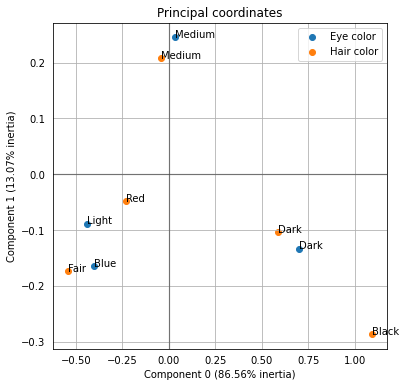

In [9]:
ca.plot_coordinates(X)

# MCA

In [10]:
import pandas as pd

X = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/balloons/adult+stretch.data')
X.columns = ['Color', 'Size', 'Action', 'Age', 'Inflated']
X.head()

,Color,Size,Action,Age,Inflated
0,YELLOW,SMALL,STRETCH,ADULT,T
1,YELLOW,SMALL,STRETCH,CHILD,F
2,YELLOW,SMALL,DIP,ADULT,F
3,YELLOW,SMALL,DIP,CHILD,F
4,YELLOW,LARGE,STRETCH,ADULT,T


In [12]:
mca = prince.MCA(
  n_components=2,
  n_iter=3,
  copy=True,
  check_input=True,
  engine='auto',
  random_state=42
)
mca = mca.fit(X)

<AxesSubplot:title={'center':'Row and column principal coordinates'}, xlabel='Component 0 (40.17% inertia)', ylabel='Component 1 (21.11% inertia)'>

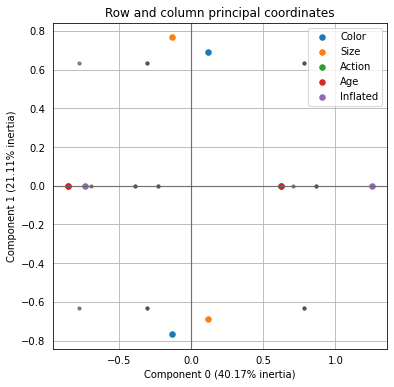

In [13]:
mca.plot_coordinates(X)

# MFA

In [14]:
import pandas as pd

X = pd.DataFrame(
    data=[
        [1, 6, 7, 2, 5, 7, 6, 3, 6, 7],
        [5, 3, 2, 4, 4, 4, 2, 4, 4, 3],
        [6, 1, 1, 5, 2, 1, 1, 7, 1, 1],
        [7, 1, 2, 7, 2, 1, 2, 2, 2, 2],
        [2, 5, 4, 3, 5, 6, 5, 2, 6, 6],
        [3, 4, 4, 3, 5, 4, 5, 1, 7, 5]
    ],
    columns=['E1 fruity', 'E1 woody', 'E1 coffee',
             'E2 red fruit', 'E2 roasted', 'E2 vanillin', 'E2 woody',
             'E3 fruity', 'E3 butter', 'E3 woody'],
    index=['Wine {}'.format(i+1) for i in range(6)]
)
X['Oak type'] = [1, 2, 2, 2, 1, 1]

In [15]:
X

,E1 fruity,E1 woody,E1 coffee,E2 red fruit,E2 roasted,E2 vanillin,E2 woody,E3 fruity,E3 butter,E3 woody,Oak type
Wine 1,1,6,7,2,5,7,6,3,6,7,1
Wine 2,5,3,2,4,4,4,2,4,4,3,2
Wine 3,6,1,1,5,2,1,1,7,1,1,2
Wine 4,7,1,2,7,2,1,2,2,2,2,2
Wine 5,2,5,4,3,5,6,5,2,6,6,1
Wine 6,3,4,4,3,5,4,5,1,7,5,1


In [16]:
groups = {
    'Expert #{}'.format(no+1): [c for c in X.columns if c.startswith('E{}'.format(no+1))]
    for no in range(3)
 }
import pprint
pprint.pprint(groups)

{'Expert #1': ['E1 fruity', 'E1 woody', 'E1 coffee'],
 'Expert #2': ['E2 red fruit', 'E2 roasted', 'E2 vanillin', 'E2 woody'],
 'Expert #3': ['E3 fruity', 'E3 butter', 'E3 woody']}


In [20]:
mfa = prince.MFA(
    groups=groups,
    n_components=2,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=42
)
mfa = mfa.fit(X)

In [22]:
mfa.row_coordinates(X)

,0,1
Wine 1,-2.172155,-0.508596
Wine 2,0.557017,-0.197408
Wine 3,2.317663,-0.830259
Wine 4,1.832557,0.905046
Wine 5,-1.403787,0.054977
Wine 6,-1.131296,0.576241


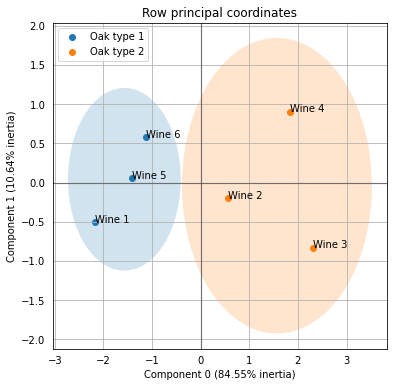

In [23]:
ax = mfa.plot_row_coordinates(
    X,
    ax=None,
    figsize=(6, 6),
    x_component=0,
    y_component=1,
    labels=X.index,
    color_labels=['Oak type {}'.format(t) for t in X['Oak type']],
    ellipse_outline=False,
    ellipse_fill=True,
    show_points=True
)